In [1]:
import pandas as pd

In [22]:
from google.colab import files
uploaded = files.upload()

Saving covid19_tweet160621.csv to covid19_tweet160621.csv


In [2]:
df_tweet = pd.read_csv('/content/covid19_tweet160621.csv')
df_tweet = df_tweet[['sentiment', 'Content']]
df_tweet

,sentiment,Content
0,-18.181818,Myanmar people are suffering Covid-19 virus an...
1,0.000000,@BMarchetich @oriwa_ @androidmunk The reality ...
2,-18.181818,Myanmar people are suffering Covid-19 virus an...
3,-6.250000,"COVID-19: 600,000 American lives have now been..."
4,-18.181818,Myanmar people are suffering Covid-19 virus an...
...,...,...
6495,0.000000,ICYMI: Here are Tuesday's COVID-19 numbers for...
6496,8.695652,Get the vaccine to safely make memories with t...
6497,-3.225806,Shasta County #COVID19 update for Tuesday: Ano...
6498,4.545455,The HB 271 bill helps local governments gain m...


In [3]:
def f(row):
  if row['sentiment'] > 0:
    val = 'positive'
  elif row['sentiment'] < 0:
    val = 'negative'
  else:
    val = 'neutral'
  return val

df_tweet['sentimen'] = df_tweet.apply(f, axis=1)

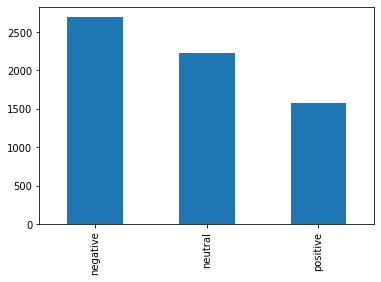

In [4]:
pd.value_counts(df_tweet['sentimen']).plot.bar()

In [5]:
df_tweet = df_tweet.drop(columns=['sentiment'])

In [6]:
category  = pd.get_dummies(df_tweet['sentimen'])

In [7]:
new_df = pd.concat([df_tweet, category], axis=1)
new_df = new_df.drop(columns=['sentimen'])
new_df

,Content,negative,neutral,positive
0,Myanmar people are suffering Covid-19 virus an...,1,0,0
1,@BMarchetich @oriwa_ @androidmunk The reality ...,0,1,0
2,Myanmar people are suffering Covid-19 virus an...,1,0,0
3,"COVID-19: 600,000 American lives have now been...",1,0,0
4,Myanmar people are suffering Covid-19 virus an...,1,0,0
...,...,...,...,...
6495,ICYMI: Here are Tuesday's COVID-19 numbers for...,0,1,0
6496,Get the vaccine to safely make memories with t...,0,0,1
6497,Shasta County #COVID19 update for Tuesday: Ano...,1,0,0
6498,The HB 271 bill helps local governments gain m...,0,0,1


In [8]:
#Removing RT, Punctuation etc
print(new_df.shape)
#remove punctuations, emoji, number, Single character removal, multiple space, and enter
new_df['Content'] = new_df['Content'].str.lower().str.replace(r"[^a-zA-Z]", " ").str.replace(r"\s+[a-zA-Z]\s+", " ").str.strip().replace('\s+', ' ', regex=True).str.strip()

#Removes duplicates in place
new_df.drop_duplicates(keep=False, inplace=True)
print(new_df.shape) 
new_df

(6500, 4)
(6302, 4)


,Content,negative,neutral,positive
0,myanmar people are suffering covid virus and m...,1,0,0
1,bmarchetich oriwa androidmunk the reality is t...,0,1,0
2,myanmar people are suffering covid virus and m...,1,0,0
3,covid american lives have now been lost to the...,1,0,0
4,myanmar people are suffering covid virus and m...,1,0,0
...,...,...,...,...
6495,icymi here are tuesday covid numbers for milto...,0,1,0
6496,get the vaccine to safely make memories with t...,0,0,1
6497,shasta county covid update for tuesday another...,1,0,0
6498,the hb bill helps local governments gain more ...,0,0,1


In [9]:
#removing stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stopword(sentence):
    review = [words for words in sentence.split() if words not in set(stopwords.words('english'))]
    review = ' '.join(review)
    return review
print(stopwords.words('english'))
new_df['Content'] = new_df['Content'].apply(stopword)
new_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

,Content,negative,neutral,positive
0,myanmar people suffering covid virus cruel min...,1,0,0
1,bmarchetich oriwa androidmunk reality possible...,0,1,0
2,myanmar people suffering covid virus cruel min...,1,0,0
3,covid american lives lost pandemic https co lq...,1,0,0
4,myanmar people suffering covid virus cruel min...,1,0,0
...,...,...,...,...
6495,icymi tuesday covid numbers milton halton http...,0,1,0
6496,get vaccine safely make memories ones love fin...,0,0,1
6497,shasta county covid update tuesday another cor...,1,0,0
6498,hb bill helps local governments gain control p...,0,0,1


In [10]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text
new_df['Content'] = new_df['Content'].apply(stemm_text)
new_df

,Content,negative,neutral,positive
0,myanmar peopl suffer covid virus cruel min aun...,1,0,0
1,bmarchetich oriwa androidmunk realiti possibl ...,0,1,0
2,myanmar peopl suffer covid virus cruel min aun...,1,0,0
3,covid american live lost pandem https co lqsth...,1,0,0
4,myanmar peopl suffer covid virus cruel min aun...,1,0,0
...,...,...,...,...
6495,icymi tuesday covid number milton halton https...,0,1,0
6496,get vaccin safe make memori one love find covi...,0,0,1
6497,shasta counti covid updat tuesday anoth corona...,1,0,0
6498,hb bill help local govern gain control public ...,0,0,1


In [11]:
sentimen = new_df['Content'].values
label = new_df[['negative', 'neutral', 'positive']].values

In [12]:
from sklearn.model_selection import train_test_split
sentimen_latih, sentimen_test, label_latih, label_test = train_test_split(sentimen, label, test_size=0.2)

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=300000, oov_token='x')
tokenizer.fit_on_texts(sentimen_latih)

sekuens_latih = tokenizer.texts_to_sequences(sentimen_latih)
sekuens_test = tokenizer.texts_to_sequences(sentimen_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

padded_latih.shape

(5041, 75)

In [14]:
a = tokenizer.word_index
jumlah_vocab = len(a)
jumlah_vocab

16539

In [15]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=jumlah_vocab+2, output_dim=16),
    tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          264656    
_________________________________________________________________
dropout (Dropout)            (None, None, 16)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               148480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 429,779
Trainable params: 429,779
Non-trainable params: 0
__________________________________________________

In [16]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [17]:
from keras.callbacks import ModelCheckpoint
checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)

In [18]:
history = model.fit(padded_latih, label_latih, epochs=30, validation_data=(padded_test, label_test), callbacks=[checkpoint1])

Epoch 1/30
158/158 [==============================] - 26s 137ms/step - loss: 0.9664 - accuracy: 0.5362 - val_loss: 0.7571 - val_accuracy: 0.6312

Epoch 00001: val_accuracy improved from -inf to 0.63125, saving model to best_model1.hdf5
Epoch 2/30
158/158 [==============================] - 21s 132ms/step - loss: 0.6772 - accuracy: 0.6989 - val_loss: 0.6318 - val_accuracy: 0.7216

Epoch 00002: val_accuracy improved from 0.63125 to 0.72165, saving model to best_model1.hdf5
Epoch 3/30
158/158 [==============================] - 21s 132ms/step - loss: 0.5026 - accuracy: 0.7915 - val_loss: 0.7288 - val_accuracy: 0.7010

Epoch 00003: val_accuracy did not improve from 0.72165
Epoch 4/30
158/158 [==============================] - 21s 130ms/step - loss: 0.3828 - accuracy: 0.8552 - val_loss: 0.6544 - val_accuracy: 0.7185

Epoch 00004: val_accuracy did not improve from 0.72165
Epoch 5/30
158/158 [==============================] - 21s 131ms/step - loss: 0.2843 - accuracy: 0.9034 - val_loss: 0.7747 -

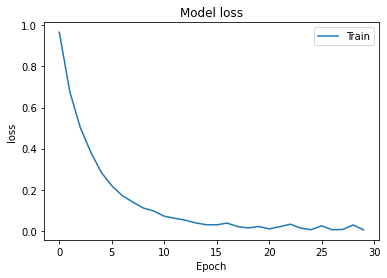

In [20]:
import matplotlib.pyplot as plt
#loss plot
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

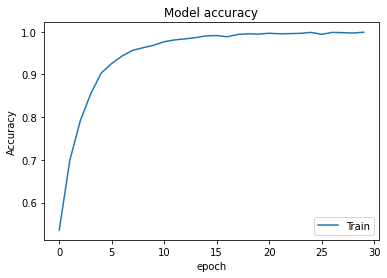

In [21]:
#akurasi plot
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

Dwi Atmoko Purbo Sakti [profil dicoding](https://www.dicoding.com/users/dwi_atmoko)